In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/09_Sep.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,26.000000,84.000000,1,6,1,2611.0,2627.0,2573.0,3066.0,3156.0,3562.0,2628.416667,2696.0
1,26.000000,84.666667,1,6,1,2634.0,2624.0,2597.0,3057.0,3098.0,3513.0,2635.750000,2685.0
2,26.000000,85.333333,1,6,1,2652.0,2598.0,2627.0,3028.0,3090.0,3487.0,2639.166667,2668.0
3,26.000000,86.000000,1,6,1,2662.0,2608.0,2605.0,2988.0,3052.0,3468.0,2641.666667,2635.0
4,26.000000,86.666667,2,6,1,2696.0,2611.0,2627.0,2968.0,3055.0,3477.0,2641.000000,2619.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,25.212452,87.862340,23,2,1,2694.0,2709.0,2765.0,2363.0,2560.0,3293.0,2691.250000,2656.0
8636,25.212452,87.862340,24,2,1,2681.0,2691.0,2748.0,2344.0,2545.0,3289.0,2683.000000,2649.0
8637,25.212452,87.862340,24,2,1,2663.0,2675.0,2708.0,2331.0,2534.0,3275.0,2673.583333,2595.0
8638,25.000000,87.862340,24,2,1,2682.0,2701.0,2687.0,2316.0,2542.0,3251.0,2664.750000,2581.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   int64  
 3   B       8640 non-null   int64  
 4   C       8640 non-null   int64  
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 877.6 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   float64
 3   B       8640 non-null   float64
 4   C       8640 non-null   float64
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(13)
memory usage: 877.6 KB


In [6]:
train = stlf_data.copy()[stlf_data.index <= 4800][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-1.076249,-1.17948,1.420610,-1.660674,0.958327,0.717627,-1.306794,-1.262406,-1.408026,-0.101867,0.128640,1.157836,-1.284194
1,-1.106195,-1.17948,1.470215,-1.660674,0.958327,0.717627,-1.244262,-1.270552,-1.342962,-0.125973,-0.024606,1.030692,-1.263870
2,-1.152475,-1.17948,1.519820,-1.660674,0.958327,0.717627,-1.195324,-1.341145,-1.261632,-0.203646,-0.045744,0.963228,-1.254401
3,-1.242313,-1.17948,1.569426,-1.660674,0.958327,0.717627,-1.168137,-1.313994,-1.321274,-0.310781,-0.146147,0.913927,-1.247473
4,-1.285871,-1.17948,1.619031,-1.516238,0.958327,0.717627,-1.075699,-1.305848,-1.261632,-0.364349,-0.138220,0.937280,-1.249320


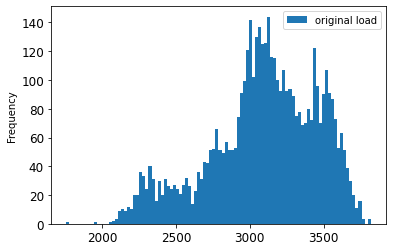

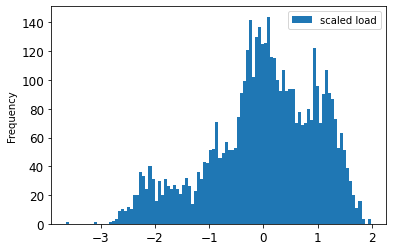

In [8]:
stlf_data[stlf_data.index <= 4800][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 4800][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

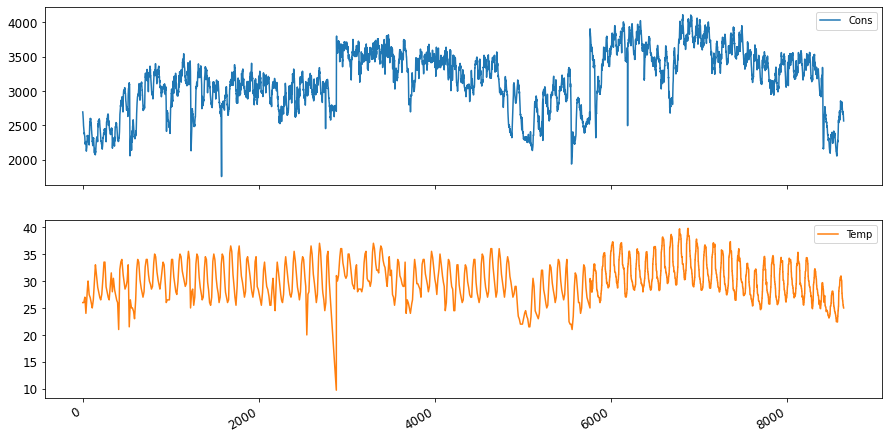

In [9]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [10]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+1'] = train_shifted['Cons'].shift(-1)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
0,-1.076249,-1.17948,1.420610,-1.660674,0.958327,0.717627,-1.306794,-1.262406,-1.408026,-0.101867,0.128640,1.157836,-1.284194,-1.106195
1,-1.106195,-1.17948,1.470215,-1.660674,0.958327,0.717627,-1.244262,-1.270552,-1.342962,-0.125973,-0.024606,1.030692,-1.263870,-1.152475
2,-1.152475,-1.17948,1.519820,-1.660674,0.958327,0.717627,-1.195324,-1.341145,-1.261632,-0.203646,-0.045744,0.963228,-1.254401,-1.242313
3,-1.242313,-1.17948,1.569426,-1.660674,0.958327,0.717627,-1.168137,-1.313994,-1.321274,-0.310781,-0.146147,0.913927,-1.247473,-1.285871
4,-1.285871,-1.17948,1.619031,-1.516238,0.958327,0.717627,-1.075699,-1.305848,-1.261632,-0.364349,-0.138220,0.937280,-1.249320,-1.329428
5,-1.329428,-1.17948,1.668636,-1.516238,0.958327,0.717627,-1.105605,-1.243400,-1.269765,-0.468806,-0.212201,0.854247,-1.254170,-1.372986
6,-1.372986,-1.17948,1.718242,-1.516238,0.958327,0.717627,-1.151824,-1.194528,-1.340251,-0.557192,-0.254476,0.786783,-1.256711,-1.479158
7,-1.479158,-1.17948,1.767847,-1.516238,0.958327,0.717627,-1.241544,-1.167377,-1.313141,-0.610760,-0.333741,0.766025,-1.270568,-1.571718
8,-1.571718,-1.17948,1.817452,-1.371801,0.958327,0.717627,-1.285044,-1.075062,-1.305008,-0.621474,-0.346952,0.698561,-1.292970,-1.615275
9,-1.615275,-1.17948,1.867058,-1.371801,0.958327,0.717627,-1.328544,-1.104929,-1.242655,-0.755393,-0.383943,0.636286,-1.324380,-1.661555


In [11]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4791,-0.207818,-0.766105,1.136507,1.372493,0.464241,0.717627,-0.260068,-0.418001,-0.589305,0.492733,0.567241,0.301561,-0.364308,-0.248654
4792,-0.248654,-0.726101,1.116213,1.516930,0.464241,0.717627,-0.284537,-0.412571,-0.510686,0.543623,0.643865,0.306750,-0.342136,0.034471
4793,0.034471,-0.686097,1.095920,1.516930,0.464241,0.717627,-0.216568,-0.456013,-0.456467,0.615939,0.770689,0.519522,-0.300565,0.227758
4794,0.227758,-0.646093,1.075627,1.516930,0.464241,0.717627,-0.216568,-0.401710,-0.445623,0.940023,1.074540,0.742672,-0.243519,0.249537
4795,0.249537,-0.606089,1.055334,1.516930,0.464241,0.717627,-0.208412,-0.260524,-0.418513,1.191791,1.071897,0.833489,-0.186936,0.252259
4796,0.252259,-0.566085,1.035041,1.661366,0.464241,0.717627,-0.249193,-0.284960,-0.413091,1.248037,1.045476,0.908737,-0.130583,0.303984
4797,0.303984,-0.526081,1.014748,1.661366,0.464241,0.717627,0.033559,-0.217082,-0.456467,1.231967,1.108888,0.846463,-0.066147,0.325763
4798,0.325763,-0.486077,0.994455,1.661366,0.464241,0.717627,0.226591,-0.217082,-0.402247,1.065907,0.968853,0.675208,-0.004483,0.290372
4799,0.290372,-0.446073,0.974162,1.661366,0.464241,0.717627,0.248341,-0.208936,-0.261275,0.993591,0.913367,0.579201,0.042170,0.260427
4800,0.260427,-0.446073,0.974162,-1.660674,0.958327,0.717627,0.251060,-0.249663,-0.285674,0.910561,0.844670,0.488384,0.088360,NaN


In [12]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.interpolate()

In [13]:
train_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4791,-0.207818,-0.766105,1.136507,1.372493,0.464241,0.717627,-0.260068,-0.418001,-0.589305,0.492733,0.567241,0.301561,-0.364308,-0.248654
4792,-0.248654,-0.726101,1.116213,1.516930,0.464241,0.717627,-0.284537,-0.412571,-0.510686,0.543623,0.643865,0.306750,-0.342136,0.034471
4793,0.034471,-0.686097,1.095920,1.516930,0.464241,0.717627,-0.216568,-0.456013,-0.456467,0.615939,0.770689,0.519522,-0.300565,0.227758
4794,0.227758,-0.646093,1.075627,1.516930,0.464241,0.717627,-0.216568,-0.401710,-0.445623,0.940023,1.074540,0.742672,-0.243519,0.249537
4795,0.249537,-0.606089,1.055334,1.516930,0.464241,0.717627,-0.208412,-0.260524,-0.418513,1.191791,1.071897,0.833489,-0.186936,0.252259
4796,0.252259,-0.566085,1.035041,1.661366,0.464241,0.717627,-0.249193,-0.284960,-0.413091,1.248037,1.045476,0.908737,-0.130583,0.303984
4797,0.303984,-0.526081,1.014748,1.661366,0.464241,0.717627,0.033559,-0.217082,-0.456467,1.231967,1.108888,0.846463,-0.066147,0.325763
4798,0.325763,-0.486077,0.994455,1.661366,0.464241,0.717627,0.226591,-0.217082,-0.402247,1.065907,0.968853,0.675208,-0.004483,0.290372
4799,0.290372,-0.446073,0.974162,1.661366,0.464241,0.717627,0.248341,-0.208936,-0.261275,0.993591,0.913367,0.579201,0.042170,0.260427
4800,0.260427,-0.446073,0.974162,-1.660674,0.958327,0.717627,0.251060,-0.249663,-0.285674,0.910561,0.844670,0.488384,0.088360,0.260427


In [14]:
y_train = train_shifted[['y_t+1']]
y_train


,y_t+1
0,-1.106195
1,-1.152475
2,-1.242313
3,-1.285871
4,-1.329428
...,...
4796,0.303984
4797,0.325763
4798,0.290372
4799,0.260427


In [15]:
X_train = train_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-1.076249,-1.179480,1.420610,-1.660674,0.958327,0.717627,-1.306794,-1.262406,-1.408026,-0.101867,0.128640,1.157836,-1.284194
1,-1.106195,-1.179480,1.470215,-1.660674,0.958327,0.717627,-1.244262,-1.270552,-1.342962,-0.125973,-0.024606,1.030692,-1.263870
2,-1.152475,-1.179480,1.519820,-1.660674,0.958327,0.717627,-1.195324,-1.341145,-1.261632,-0.203646,-0.045744,0.963228,-1.254401
3,-1.242313,-1.179480,1.569426,-1.660674,0.958327,0.717627,-1.168137,-1.313994,-1.321274,-0.310781,-0.146147,0.913927,-1.247473
4,-1.285871,-1.179480,1.619031,-1.516238,0.958327,0.717627,-1.075699,-1.305848,-1.261632,-0.364349,-0.138220,0.937280,-1.249320
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,0.252259,-0.566085,1.035041,1.661366,0.464241,0.717627,-0.249193,-0.284960,-0.413091,1.248037,1.045476,0.908737,-0.130583
4797,0.303984,-0.526081,1.014748,1.661366,0.464241,0.717627,0.033559,-0.217082,-0.456467,1.231967,1.108888,0.846463,-0.066147
4798,0.325763,-0.486077,0.994455,1.661366,0.464241,0.717627,0.226591,-0.217082,-0.402247,1.065907,0.968853,0.675208,-0.004483
4799,0.290372,-0.446073,0.974162,1.661366,0.464241,0.717627,0.248341,-0.208936,-0.261275,0.993591,0.913367,0.579201,0.042170


In [16]:
X_train=np.atleast_3d(X_train)
X_train.shape

(4801, 13, 1)

In [17]:
valid = stlf_data.copy()[(stlf_data.index >=4801) & (stlf_data.index <=5761)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4801,3155.0,28.875000,76.333333,1.0,6.0,1.0,3203.0,3104.0,3012.0,3405.0,3421.0,3269.0,3135.583333
4802,3156.0,29.250000,74.666667,1.0,6.0,1.0,3211.0,3175.0,3012.0,3427.0,3440.0,3281.0,3147.583333
4803,3162.0,29.625000,73.000000,1.0,6.0,1.0,3198.0,3183.0,3015.0,3388.0,3434.0,3262.0,3159.833333
4804,3140.0,30.000000,71.333333,2.0,6.0,1.0,3187.0,3184.0,3000.0,3363.0,3421.0,3240.0,3171.500000
4805,3143.0,30.375000,69.666667,2.0,6.0,1.0,3155.0,3203.0,3104.0,3382.0,3354.0,3249.0,3174.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5757,2661.0,25.114286,106.000000,24.0,1.0,0.0,2624.0,2556.0,2576.0,2768.0,2400.0,3139.0,2602.666667
5758,2586.0,25.057143,107.000000,24.0,1.0,0.0,2691.0,2547.0,2566.0,2716.0,2362.0,3110.0,2604.333333
5759,2580.0,25.000000,108.000000,24.0,1.0,0.0,2694.0,2519.0,2584.0,2661.0,2345.0,3086.0,2604.000000
5760,3906.0,30.462452,80.225310,1.0,1.0,0.0,3820.0,3799.0,3749.0,3760.0,3997.0,3971.0,3824.000000


In [18]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4801,1.440024,0.425948,0.324419,-1.658081,0.811017,0.819332,1.580846,1.252862,0.953646,1.999804,1.632254,1.063074,1.399350
4802,1.443238,0.531198,0.200492,-1.658081,0.811017,0.819332,1.606460,1.479422,0.953646,2.067897,1.685205,1.095975,1.438807
4803,1.462523,0.636447,0.076565,-1.658081,0.811017,0.819332,1.564838,1.504949,0.963219,1.947187,1.668484,1.043882,1.479086
4804,1.391812,0.741697,-0.047362,-1.513750,0.811017,0.819332,1.529619,1.508140,0.915351,1.869810,1.632254,0.983563,1.517446
4805,1.401454,0.846946,-0.171289,-1.513750,0.811017,0.819332,1.427165,1.568769,1.247239,1.928617,1.445529,1.008239,1.528133
4806,1.395026,0.952196,-0.295215,-1.513750,0.811017,0.819332,1.430367,1.594297,1.473817,1.968853,1.557006,1.148069,1.518816
4807,1.346814,1.057445,-0.419142,-1.513750,0.811017,0.819332,1.449577,1.552814,1.499346,1.993614,1.520776,1.109684,1.503198
4808,1.211821,1.162695,-0.543069,-1.369419,0.811017,0.819332,1.379140,1.517713,1.502538,1.866715,1.570941,1.074041,1.475798
4809,1.128254,1.267944,-0.666996,-1.369419,0.811017,0.819332,1.388745,1.415602,1.563171,1.742910,1.428807,0.936952,1.436067
4810,1.108970,1.373194,-0.790923,-1.369419,0.811017,0.819332,1.382341,1.418793,1.588701,1.575774,1.303395,0.797122,1.392500


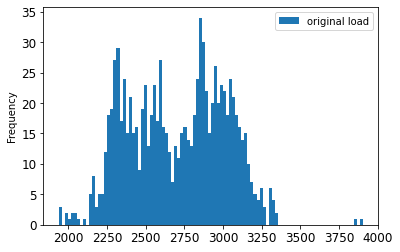

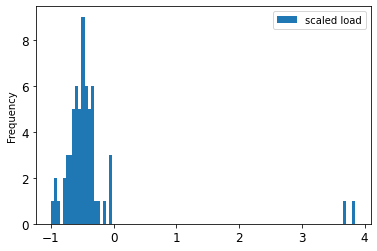

In [19]:
stlf_data[(stlf_data.index >=4801) & (stlf_data.index <=5761)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=5700) & (valid.index <=6899)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [20]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+1'] = valid_shifted['Cons'].shift(-1)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4801,1.440024,0.425948,0.324419,-1.658081,0.811017,0.819332,1.580846,1.252862,0.953646,1.999804,1.632254,1.063074,1.399350,1.443238
4802,1.443238,0.531198,0.200492,-1.658081,0.811017,0.819332,1.606460,1.479422,0.953646,2.067897,1.685205,1.095975,1.438807,1.462523
4803,1.462523,0.636447,0.076565,-1.658081,0.811017,0.819332,1.564838,1.504949,0.963219,1.947187,1.668484,1.043882,1.479086,1.391812
4804,1.391812,0.741697,-0.047362,-1.513750,0.811017,0.819332,1.529619,1.508140,0.915351,1.869810,1.632254,0.983563,1.517446,1.401454
4805,1.401454,0.846946,-0.171289,-1.513750,0.811017,0.819332,1.427165,1.568769,1.247239,1.928617,1.445529,1.008239,1.528133,1.395026
4806,1.395026,0.952196,-0.295215,-1.513750,0.811017,0.819332,1.430367,1.594297,1.473817,1.968853,1.557006,1.148069,1.518816,1.346814
4807,1.346814,1.057445,-0.419142,-1.513750,0.811017,0.819332,1.449577,1.552814,1.499346,1.993614,1.520776,1.109684,1.503198,1.211821
4808,1.211821,1.162695,-0.543069,-1.369419,0.811017,0.819332,1.379140,1.517713,1.502538,1.866715,1.570941,1.074041,1.475798,1.128254
4809,1.128254,1.267944,-0.666996,-1.369419,0.811017,0.819332,1.388745,1.415602,1.563171,1.742910,1.428807,0.936952,1.436067,1.108970
4810,1.108970,1.373194,-0.790923,-1.369419,0.811017,0.819332,1.382341,1.418793,1.588701,1.575774,1.303395,0.797122,1.392500,1.070400


In [21]:
valid_shifted = valid_shifted.interpolate()

In [22]:
valid_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5752,-0.578443,-0.549364,2.158535,1.517204,-1.431179,-1.220507,-0.442625,-0.349011,-0.527086,-0.501046,-1.873714,0.295377,-0.459223,-0.266673
5753,-0.266673,-0.565402,2.232891,1.517204,-1.431179,-1.220507,-0.490651,-0.431976,-0.428158,-0.346290,-1.645185,0.558587,-0.446892,-0.051327
5754,-0.051327,-0.581440,2.307247,1.517204,-1.431179,-1.220507,-0.519466,-0.463886,-0.332421,0.003457,-1.330261,0.846474,-0.424424,-0.041685
5755,-0.041685,-0.597478,2.381603,1.517204,-1.431179,-1.220507,-0.609113,-0.406448,-0.335612,0.127262,-1.196488,0.849216,-0.400860,-0.048113
5756,-0.048113,-0.613516,2.455960,1.661535,-1.431179,-1.220507,-0.583500,-0.447931,-0.354760,0.102501,-1.204849,0.788897,-0.376199,-0.147751
5757,-0.147751,-0.629554,2.530316,1.661535,-1.431179,-1.220507,-0.272935,-0.495796,-0.437732,0.028218,-1.213210,0.706643,-0.352909,-0.388810
5758,-0.388810,-0.645592,2.604672,1.661535,-1.431179,-1.220507,-0.058422,-0.524515,-0.469644,-0.132727,-1.319113,0.627132,-0.347429,-0.408094
5759,-0.408094,-0.661630,2.679028,1.661535,-1.431179,-1.220507,-0.048817,-0.613862,-0.412202,-0.302959,-1.366491,0.561329,-0.348525,3.853827
5760,3.853827,0.871491,0.613811,-1.658081,-1.431179,-1.220507,3.556293,3.470594,3.305584,3.098569,3.237530,2.987800,3.662902,3.680264
5761,3.680264,0.871491,0.613811,-1.658081,-1.431179,-1.220507,3.642738,3.480167,3.241760,3.049047,3.081461,2.960383,3.696605,3.680264


In [23]:
y_valid = valid_shifted[['y_t+1']]
y_valid


,y_t+1
4801,1.443238
4802,1.462523
4803,1.391812
4804,1.401454
4805,1.395026
...,...
5757,-0.388810
5758,-0.408094
5759,3.853827
5760,3.680264


In [24]:
X_valid = valid_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4801,1.440024,0.425948,0.324419,-1.658081,0.811017,0.819332,1.580846,1.252862,0.953646,1.999804,1.632254,1.063074,1.399350
4802,1.443238,0.531198,0.200492,-1.658081,0.811017,0.819332,1.606460,1.479422,0.953646,2.067897,1.685205,1.095975,1.438807
4803,1.462523,0.636447,0.076565,-1.658081,0.811017,0.819332,1.564838,1.504949,0.963219,1.947187,1.668484,1.043882,1.479086
4804,1.391812,0.741697,-0.047362,-1.513750,0.811017,0.819332,1.529619,1.508140,0.915351,1.869810,1.632254,0.983563,1.517446
4805,1.401454,0.846946,-0.171289,-1.513750,0.811017,0.819332,1.427165,1.568769,1.247239,1.928617,1.445529,1.008239,1.528133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5757,-0.147751,-0.629554,2.530316,1.661535,-1.431179,-1.220507,-0.272935,-0.495796,-0.437732,0.028218,-1.213210,0.706643,-0.352909
5758,-0.388810,-0.645592,2.604672,1.661535,-1.431179,-1.220507,-0.058422,-0.524515,-0.469644,-0.132727,-1.319113,0.627132,-0.347429
5759,-0.408094,-0.661630,2.679028,1.661535,-1.431179,-1.220507,-0.048817,-0.613862,-0.412202,-0.302959,-1.366491,0.561329,-0.348525
5760,3.853827,0.871491,0.613811,-1.658081,-1.431179,-1.220507,3.556293,3.470594,3.305584,3.098569,3.237530,2.987800,3.662902


In [25]:
X_valid=np.atleast_3d(X_valid)

print(X_valid.shape)

(961, 13, 1)


In [26]:
#from keras.layers import RepeatVector
batch_size = 300

model = models.Sequential()

model.add(LSTM(128, input_shape=(1,1)))
model.add(Dropout(0.3))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1))

In [27]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.007)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [29]:

history = model.fit(X_train,
          y_train,
          batch_size=12,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )


Epoch 1/300
401/401 [==============================] - 5s 13ms/step - loss: 0.1233 - val_loss: 0.2111
Epoch 2/300
401/401 [==============================] - 5s 13ms/step - loss: 0.0796 - val_loss: 0.1915
Epoch 3/300
401/401 [==============================] - 5s 13ms/step - loss: 0.0705 - val_loss: 0.1129
Epoch 4/300
401/401 [==============================] - 5s 13ms/step - loss: 0.0581 - val_loss: 0.0854
Epoch 5/300
401/401 [==============================] - 5s 13ms/step - loss: 0.0557 - val_loss: 0.0807
Epoch 6/300
401/401 [==============================] - 5s 13ms/step - loss: 0.0434 - val_loss: 0.0849
Epoch 7/300
401/401 [==============================] - 5s 13ms/step - loss: 0.0379 - val_loss: 0.0721
Epoch 8/300
401/401 [==============================] - 5s 13ms/step - loss: 0.0369 - val_loss: 0.0586
Epoch 9/300
401/401 [==============================] - 5s 12ms/step - loss: 0.0337 - val_loss: 0.0733
Epoch 10/300
401/401 [==============================] - 5s 13ms/step - loss: 0.032

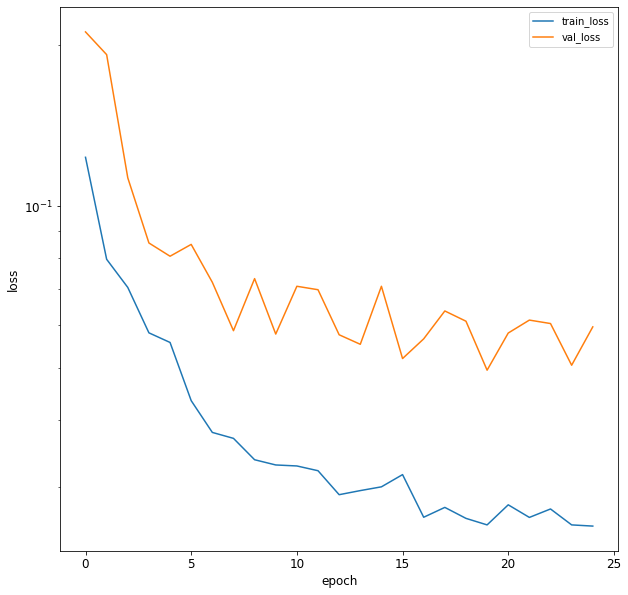

In [30]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [31]:
test = stlf_data.copy()[stlf_data.index >= 5762][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5762,3843.0,30.117452,82.142275,1.0,1.0,0.0,3893.0,3809.0,3754.0,3720.0,3934.0,3966.0,3841.666667
5763,3850.0,29.772451,84.059240,1.0,1.0,0.0,3902.0,3835.0,3792.0,3709.0,3924.0,3921.0,3846.500000
5764,3814.0,29.772451,84.059240,2.0,1.0,0.0,3906.0,3820.0,3799.0,3707.0,3909.0,3905.0,3847.750000
5765,3799.0,29.772451,84.059240,2.0,1.0,0.0,3852.0,3847.0,3802.0,3692.0,3906.0,3868.0,3847.500000
5766,3793.0,29.927450,83.147055,2.0,1.0,0.0,3843.0,3893.0,3809.0,3680.0,3913.0,3825.0,3846.166667
5767,3774.0,30.082450,82.234870,2.0,1.0,0.0,3850.0,3902.0,3835.0,3663.0,3915.0,3775.0,3841.083333
5768,3764.0,30.082450,82.234870,3.0,1.0,0.0,3814.0,3906.0,3820.0,3619.0,3894.0,3760.0,3836.416667
5769,3716.0,30.082450,82.234870,3.0,1.0,0.0,3799.0,3852.0,3847.0,3607.0,3883.0,3726.0,3825.500000
5770,3660.0,29.782450,84.208200,3.0,1.0,0.0,3793.0,3843.0,3893.0,3612.0,3848.0,3729.0,3806.083333
5771,3656.0,29.482450,86.181530,3.0,1.0,0.0,3774.0,3850.0,3902.0,3581.0,3828.0,3732.0,3785.583333


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2878 entries, 5762 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    2878 non-null   float64
 1   Temp    2878 non-null   float64
 2   Hum     2878 non-null   float64
 3   A       2878 non-null   float64
 4   B       2878 non-null   float64
 5   C       2878 non-null   float64
 6   D       2878 non-null   float64
 7   E       2878 non-null   float64
 8   F       2878 non-null   float64
 9   G       2878 non-null   float64
 10  H       2878 non-null   float64
 11  I       2878 non-null   float64
 12  J       2878 non-null   float64
dtypes: float64(13)
memory usage: 314.8 KB


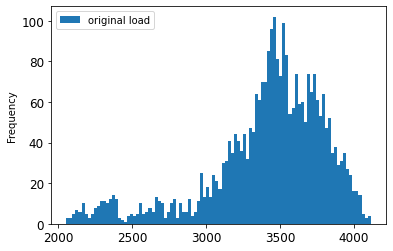

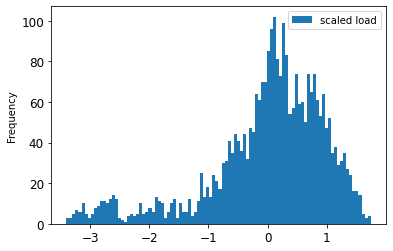

In [33]:
stlf_data[stlf_data.index >= 5762][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[test.index >=5762][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [34]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+1'] = test_shifted['Cons'].shift(-1)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5762,1.068089,-0.180495,0.780259,-1.663498,-1.394118,-1.415689,1.190874,0.978195,0.837883,0.728042,1.438939,1.587039,1.079298,1.085581
5763,1.085581,-0.276149,0.919980,-1.663498,-1.394118,-1.415689,1.213408,1.043405,0.933357,0.697802,1.405550,1.421347,1.091609,0.995620
5764,0.995620,-0.276149,0.919980,-1.518946,-1.394118,-1.415689,1.223423,1.005784,0.950944,0.692304,1.355466,1.362434,1.094793,0.958136
5765,0.958136,-0.276149,0.919980,-1.518946,-1.394118,-1.415689,1.088217,1.073502,0.958481,0.651069,1.345450,1.226198,1.094156,0.943142
5766,0.943142,-0.233174,0.853494,-1.518946,-1.394118,-1.415689,1.065683,1.188875,0.976069,0.618080,1.368822,1.067870,1.090760,0.895662
5767,0.895662,-0.190199,0.787008,-1.518946,-1.394118,-1.415689,1.083210,1.211447,1.041393,0.571347,1.375500,0.883767,1.077812,0.870673
5768,0.870673,-0.190199,0.787008,-1.374395,-1.394118,-1.415689,0.993072,1.221480,1.003706,0.450389,1.305382,0.828536,1.065925,0.750724
5769,0.750724,-0.190199,0.787008,-1.374395,-1.394118,-1.415689,0.955515,1.086043,1.071542,0.417401,1.268654,0.703347,1.038119,0.610783
5770,0.610783,-0.273377,0.930838,-1.374395,-1.394118,-1.415689,0.940492,1.063470,1.187115,0.431146,1.151792,0.714393,0.988662,0.600788
5771,0.600788,-0.356554,1.074667,-1.374395,-1.394118,-1.415689,0.892920,1.081027,1.209727,0.345926,1.085014,0.725439,0.936446,0.643270


In [35]:
test_shifted = test_shifted.interpolate()
test_shifted.tail(5)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
8635,-1.898149,-1.540445,1.197176,1.516636,-0.902418,0.70637,-1.811203,-1.780710,-1.646941,-3.002394,-3.148738,-0.890983,-1.850969,-1.915642
8636,-1.915642,-1.540445,1.197176,1.661188,-0.902418,0.70637,-1.843752,-1.825856,-1.689653,-3.054626,-3.198822,-0.905711,-1.871983,-2.050584
8637,-2.050584,-1.540445,1.197176,1.661188,-0.902418,0.70637,-1.888821,-1.865985,-1.790151,-3.090363,-3.235550,-0.957260,-1.895968,-2.085570
8638,-2.085570,-1.599349,1.197176,1.661188,-0.902418,0.70637,-1.841249,-1.800775,-1.842913,-3.131599,-3.208839,-1.045629,-1.918468,-2.125553
8639,-2.125553,-1.599349,1.207210,1.661188,-0.902418,0.70637,-1.906348,-1.818332,-1.787639,-3.183830,-3.262262,-0.780521,-1.949034,-2.125553


In [36]:
y_test = test_shifted[['y_t+1']]
y_test

,y_t+1
5762,1.085581
5763,0.995620
5764,0.958136
5765,0.943142
5766,0.895662
...,...
8635,-1.915642
8636,-2.050584
8637,-2.085570
8638,-2.125553


In [37]:
X_test = test_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5762,1.068089,-0.180495,0.780259,-1.663498,-1.394118,-1.415689,1.190874,0.978195,0.837883,0.728042,1.438939,1.587039,1.079298
5763,1.085581,-0.276149,0.919980,-1.663498,-1.394118,-1.415689,1.213408,1.043405,0.933357,0.697802,1.405550,1.421347,1.091609
5764,0.995620,-0.276149,0.919980,-1.518946,-1.394118,-1.415689,1.223423,1.005784,0.950944,0.692304,1.355466,1.362434,1.094793
5765,0.958136,-0.276149,0.919980,-1.518946,-1.394118,-1.415689,1.088217,1.073502,0.958481,0.651069,1.345450,1.226198,1.094156
5766,0.943142,-0.233174,0.853494,-1.518946,-1.394118,-1.415689,1.065683,1.188875,0.976069,0.618080,1.368822,1.067870,1.090760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,-1.898149,-1.540445,1.197176,1.516636,-0.902418,0.706370,-1.811203,-1.780710,-1.646941,-3.002394,-3.148738,-0.890983,-1.850969
8636,-1.915642,-1.540445,1.197176,1.661188,-0.902418,0.706370,-1.843752,-1.825856,-1.689653,-3.054626,-3.198822,-0.905711,-1.871983
8637,-2.050584,-1.540445,1.197176,1.661188,-0.902418,0.706370,-1.888821,-1.865985,-1.790151,-3.090363,-3.235550,-0.957260,-1.895968
8638,-2.085570,-1.599349,1.197176,1.661188,-0.902418,0.706370,-1.841249,-1.800775,-1.842913,-3.131599,-3.208839,-1.045629,-1.918468


In [38]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2878, 13, 1)

In [39]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(2878,13,1)

In [40]:
predictions = model.predict(X_test)
predictions

array([[ 1.0077385],
       [ 1.0087162],
       [ 0.9352678],
       ...,
       [-1.9703296],
       [-2.003736 ],
       [-2.0260947]], dtype=float32)

In [41]:
feature=stlf_data.copy()[stlf_data.index >= 5762][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    3415.582696
dtype: float64
Cons    400.239702
dtype: float64


In [42]:
load_mean=3415.582696
load_std=400.239702
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(2878, 1)


In [43]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(2878, 1)


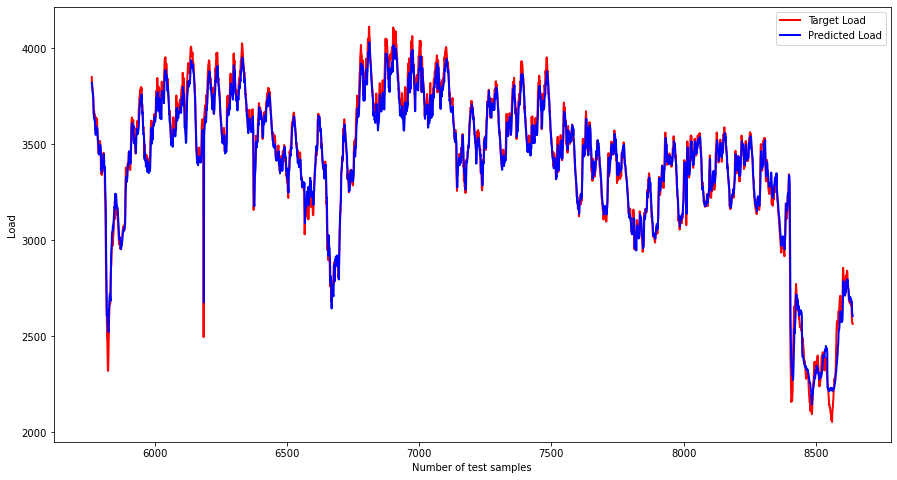

In [44]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [45]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

1.2403974115885257


In [46]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+1    0.327088
dtype: float64


In [47]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

              y_t+1
5762  384908.358393
5763  381306.786134
5764  379806.903817
5765  379207.009631
5766  377306.397484
...             ...
8635  264785.840419
8636  259382.711244
8637  257983.709651
8638  256383.317831
8639  256383.666730

[2878 rows x 1 columns]


In [48]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+1
5762   970.684742
5763    27.476462
5764    83.769474
5765   292.635831
5766    40.693926
...           ...
8635   492.801513
8636  6177.019225
8637  2127.381652
8638  2377.120493
8639  1584.596628

[2878 rows x 1 columns]
y_t+1    3533.27343
dtype: float64


In [49]:
RMSE=MSE**0.5
print(RMSE)

y_t+1    59.441344
dtype: float64


In [50]:
a=np.array(rescaled_predicted_load)

In [51]:
for i in  range(0,2879):
    b=a[i]
    print(b)

[3818.9197]
[3819.311]
[3789.914]
[3775.959]
[3767.683]
[3748.228]
[3738.042]
[3697.5386]
[3646.1472]
[3634.3186]
[3640.2537]
[3619.676]
[3620.2231]
[3597.6917]
[3557.7336]
[3548.9446]
[3578.0215]
[3593.2349]
[3565.1384]
[3562.5576]
[3584.8933]
[3582.0122]
[3555.228]
[3527.785]
[3498.212]
[3493.5063]
[3479.043]
[3446.7034]
[3473.4165]
[3470.159]
[3459.4988]
[3463.5884]
[3496.3452]
[3488.9875]
[3475.4775]
[3437.1414]
[3364.0303]
[3369.9858]
[3367.688]
[3351.0588]
[3377.5723]
[3380.7227]
[3393.4468]
[3398.2004]
[3434.5005]
[3444.0588]
[3449.7634]
[3412.2517]
[3372.7234]
[3383.458]
[3372.924]
[3270.0737]
[3239.626]
[3170.751]
[2980.7183]
[2874.6802]
[2758.8823]
[2610.1057]
[2630.9424]
[2599.3755]
[2559.0557]
[2545.7996]
[2534.4102]
[2524.4546]
[2522.6484]
[2636.7654]
[2655.6394]
[2693.9448]
[2713.0098]
[2722.916]
[2699.8684]
[2683.9883]
[2806.4314]
[2903.1646]
[2946.817]
[2962.534]
[3014.1694]
[3041.827]
[3046.9194]
[3054.894]
[3075.7104]
[3057.3364]
[3092.6484]
[3104.674]
[3134.489]
[315

[3454.4722]
[3463.5828]
[3410.5835]
[3393.8809]
[3396.6626]
[3369.38]
[3348.612]
[3382.0146]
[3373.1204]
[3377.5623]
[3413.4758]
[3424.766]
[3415.8228]
[3410.9248]
[3361.2188]
[3363.1108]
[3386.6692]
[3440.7378]
[3444.9458]
[3438.859]
[3440.4028]
[3455.638]
[3465.03]
[3485.3484]
[3466.895]
[3465.1016]
[3435.3005]
[3427.0376]
[3431.5913]
[3397.9216]
[3358.5176]
[3376.0771]
[3358.5764]
[3324.195]
[3326.523]
[3327.9077]
[3283.3303]
[3261.0703]
[3247.6433]
[3336.6233]
[3367.4717]
[3363.0376]
[3399.5994]
[3432.324]
[3429.442]
[3447.9941]
[3440.0613]
[3461.6938]
[3482.8284]
[3476.2537]
[3536.0542]
[3563.6858]
[3586.795]
[3591.0571]
[3593.3167]
[3612.6091]
[3616.2666]
[3636.604]
[3642.1404]
[3644.338]
[3630.4236]
[3616.2188]
[3605.1885]
[3590.2185]
[3566.443]
[3554.6523]
[3534.2004]
[3502.2083]
[3483.2166]
[3479.4602]
[3468.2725]
[3447.675]
[3434.2993]
[3403.7617]
[3426.84]
[3400.8613]
[3403.9087]
[3388.6357]
[3380.272]
[3414.3433]
[3405.5342]
[3414.661]
[3413.6543]
[3419.8992]
[3386.1536]
[3

[3435.713]
[3465.795]
[3470.8645]
[3483.063]
[3496.164]
[3488.944]
[3530.7373]
[3578.7854]
[3607.302]
[3613.974]
[3640.6152]
[3642.3853]
[3672.893]
[3667.8289]
[3673.291]
[3691.0964]
[3708.091]
[3695.1265]
[3665.6045]
[3684.114]
[3675.6802]
[3662.1768]
[3631.0676]
[3636.5708]
[3609.3787]
[3587.7834]
[3572.4202]
[3541.2158]
[3522.6162]
[3519.664]
[3504.402]
[3477.406]
[3478.834]
[3398.7854]
[3441.0986]
[3477.7915]
[3488.2725]
[3495.7566]
[3519.976]
[3490.3022]
[3507.8757]
[3534.7703]
[3495.1365]
[3515.0632]
[3495.548]
[3491.824]
[3469.3486]
[3444.7988]
[3439.7405]
[3447.619]
[3381.8665]
[3351.6448]
[3409.7637]
[3373.8345]
[3329.6226]
[3297.2192]
[3285.46]
[3302.1926]
[3327.592]
[3398.6282]
[3409.7122]
[3401.4534]
[3444.134]
[3517.4333]
[3508.8833]
[3498.7388]
[3528.0586]
[3524.413]
[3540.9753]
[3515.75]
[3480.5405]
[3550.0532]
[3594.1768]
[3627.864]
[3639.1711]
[3701.917]
[3716.4854]
[3701.6545]
[3697.541]
[3730.887]
[3748.353]
[3777.5574]
[3737.0552]
[3734.726]
[3737.504]
[3711.8687]
[

[3059.6282]
[3098.7441]
[3116.0332]
[3192.993]
[3247.2332]
[3301.7986]
[3323.3955]
[3289.2642]
[3258.1548]
[3258.0168]
[3261.9856]
[3265.861]
[3303.5364]
[3318.0798]
[3316.861]
[3330.7417]
[3367.3005]
[3387.7927]
[3372.9033]
[3360.073]
[3356.7915]
[3335.0164]
[3315.1182]
[3306.075]
[3341.315]
[3367.1396]
[3371.7566]
[3435.2078]
[3477.783]
[3512.2498]
[3533.1282]
[3491.6663]
[3490.7178]
[3498.8188]
[3485.6665]
[3441.7185]
[3409.2715]
[3425.3057]
[3406.597]
[3422.2527]
[3424.4238]
[3409.9795]
[3396.4194]
[3411.3728]
[3423.8708]
[3442.8682]
[3436.307]
[3428.3794]
[3431.6455]
[3428.8682]
[3423.75]
[3399.5842]
[3408.4897]
[3391.9602]
[3401.6155]
[3412.2395]
[3421.948]
[3448.1611]
[3469.6663]
[3462.293]
[3475.3276]
[3515.837]
[3495.562]
[3505.832]
[3494.0552]
[3495.008]
[3461.0657]
[3435.27]
[3410.5022]
[3406.8853]
[3391.3987]
[3340.3748]
[3335.4973]
[3269.6436]
[3268.293]
[3228.0603]
[3219.5132]
[3198.4944]
[3163.6882]
[3121.8213]
[3125.4412]
[3116.9534]
[3098.316]
[3089.578]
[3071.7478]
[3

IndexError: index 2878 is out of bounds for axis 0 with size 2878